In [2]:
np.random.seed(100)

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


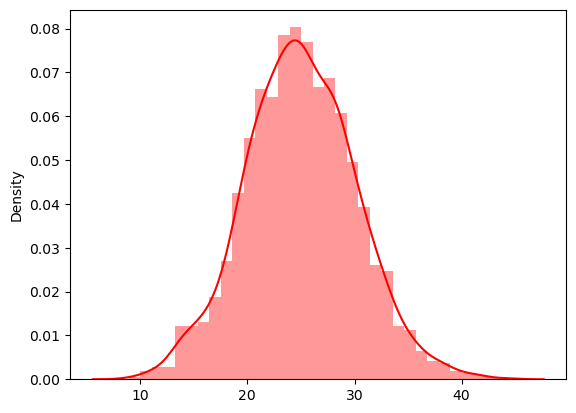

In [3]:
X1=np.random.normal(loc=25,scale=5,size=2000)#mean,SD,data points
sns.distplot(X1,color='red',kde=True);

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


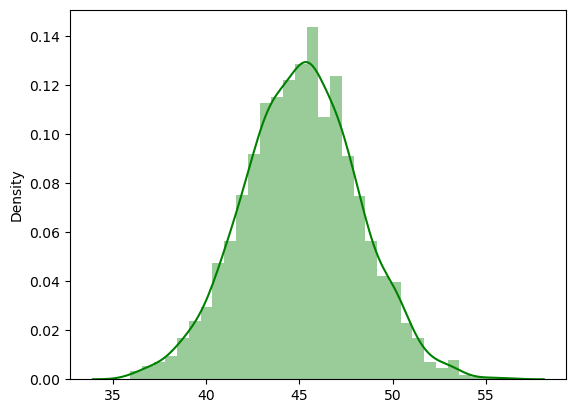

In [4]:
X2=np.random.normal(loc=45,scale=3,size=2000)#mean,SD,data points
sns.distplot(X2,color='green',kde=True);

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


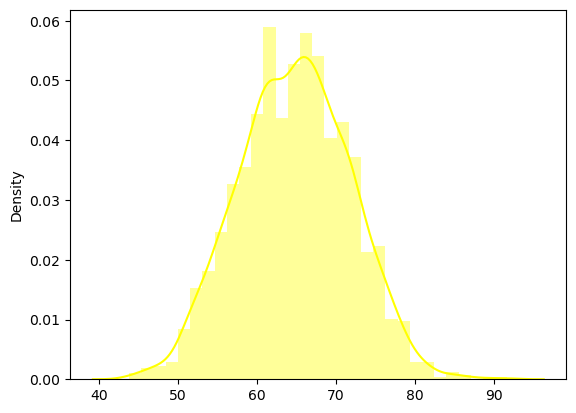

In [5]:
X3=np.random.normal(loc=65,scale=7,size=2000)#mean,SD,data points
sns.distplot(X3,color='yellow',kde=True);

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


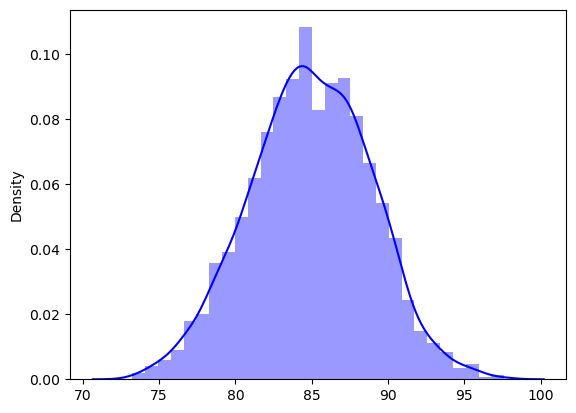

In [6]:
X4=np.random.normal(loc=85,scale=4,size=2000)#mean,SD,data points
sns.distplot(X4,color='blue',kde=True);

In [7]:
#Creating a mixture of Gaussian
X=np.hstack((X1,X2,X3,X4))

In [8]:
X

array([16.25117263, 26.71340202, 30.76517901, ..., 78.21331852,
       87.58552884, 86.39771956])

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


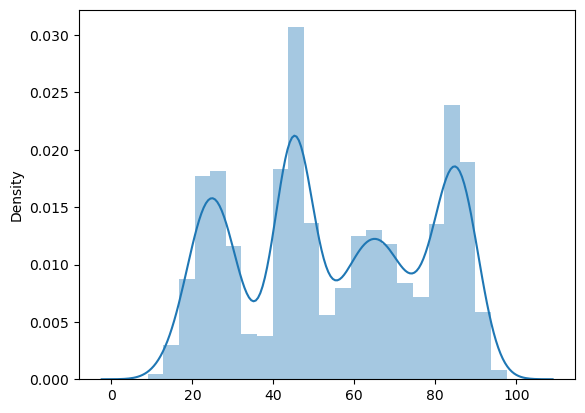

In [9]:
sns.distplot(X,kde=True);

C:\Users\Rudrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


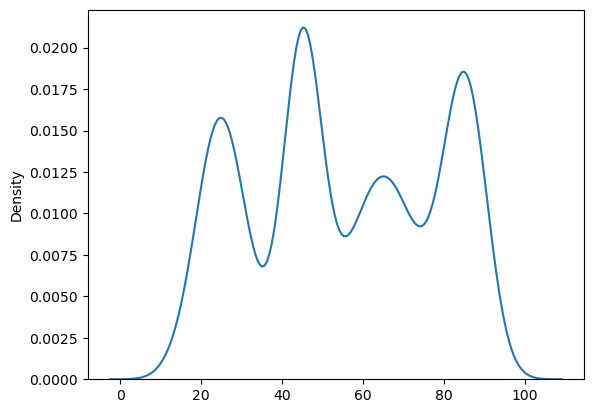

In [10]:
sns.distplot(X,kde=True,hist=False);

In [11]:
X

array([16.25117263, 26.71340202, 30.76517901, ..., 78.21331852,
       87.58552884, 86.39771956])

In [12]:
#Building a GM model for clustering
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4,n_init=10)

In [13]:
gmm.fit(X.reshape(-1,1))

GaussianMixture(n_components=4, n_init=10)

In [14]:
#Predicting
pred=gmm.predict(X.reshape(-1,1))

In [15]:
pred

array([3, 3, 3, ..., 0, 0, 0], dtype=int64)

In [16]:
np.unique(pred)#Cluster labels

array([0, 1, 2, 3], dtype=int64)

In [17]:
np.bincount(pred)#no of data points belonging to each cluster

array([2060, 2085, 1877, 1978], dtype=int64)

In [18]:
gmm.means_
#Estimation of parameters(population means)


array([[84.73025748],
       [45.17423966],
       [64.76344111],
       [24.85833579]])

In [19]:
gmm.covariances_

array([[[16.97315764]],

       [[10.44596771]],

       [[42.67633503]],

       [[24.86171226]]])

In [20]:
gmm.weights_#no of data points/ 2000

array([0.25613105, 0.25761168, 0.23850193, 0.24775534])

In [21]:
#Creating a sample of data points, generative model
gmm.sample(1000)

(array([[83.96645713],
        [85.77864297],
        [85.08658812],
        [85.66494266],
        [81.06885149],
        [81.71763764],
        [75.97286059],
        [80.08054198],
        [82.28869498],
        [82.14066748],
        [78.94831182],
        [80.41084674],
        [80.83213671],
        [83.70437399],
        [92.32390632],
        [80.45869258],
        [86.52803996],
        [83.59597743],
        [84.97837495],
        [83.14568957],
        [82.52356857],
        [82.88332206],
        [84.62596072],
        [91.77689159],
        [92.30589256],
        [80.32260815],
        [82.34933653],
        [85.90344619],
        [73.62818152],
        [85.70984686],
        [84.86157499],
        [90.5460915 ],
        [86.03564555],
        [86.45534353],
        [76.85083836],
        [80.79379615],
        [88.39488294],
        [80.69850643],
        [83.97475805],
        [85.85605151],
        [84.07531115],
        [86.24602085],
        [84.30181391],
        [84

In [22]:
#Finding the no of clusters
n_components=np.arange(1,10)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X.reshape(-1,1))
    aic_score=model.aic(X.reshape(-1,1))
    bic_score=model.bic(X.reshape(-1,1))
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

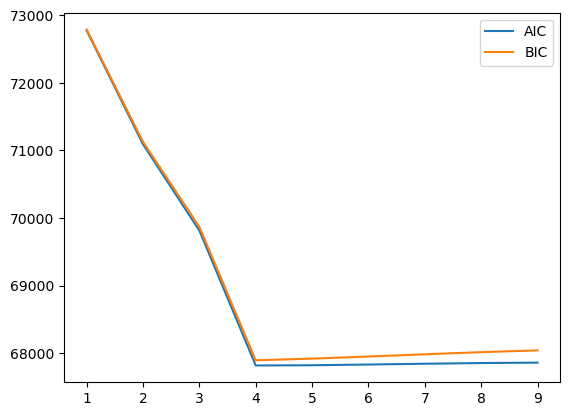

In [23]:
#Plotting
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

In [24]:
#the no of clusters=4


In [25]:
#Building GMM model for the data
data=pd.read_csv('gmm_data.csv')

In [26]:
data#no of clusters=4

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679
...,...,...
495,59.976983,169.679741
496,66.423814,174.625574
497,53.604698,161.919208
498,50.433644,160.794875


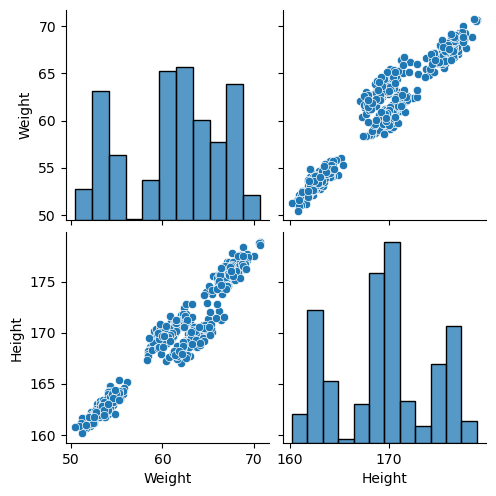

In [27]:
sns.pairplot(data);

In [28]:
#Finding no of clusters
n_components=np.arange(1,10)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(data)
    aic_score=model.aic(data)
    bic_score=model.bic(data)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rudrani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak o

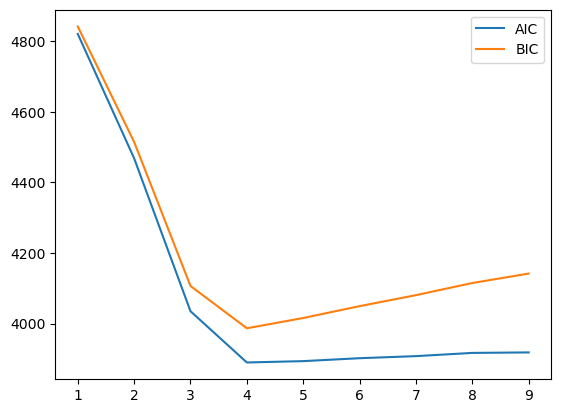

In [29]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

In [30]:
#No of clusters=4

In [31]:
#Building the model
gmm_data=GaussianMixture(n_components=4,n_init=10)

In [32]:
gmm_data.fit(data)

GaussianMixture(n_components=4, n_init=10)

In [33]:
data_pred=gmm_data.predict(data)


In [34]:
data_pred

array([0, 0, 1, 1, 0, 3, 3, 1, 1, 2, 3, 0, 3, 2, 1, 1, 0, 1, 2, 1, 1, 0,
       3, 2, 1, 2, 0, 3, 2, 3, 3, 3, 0, 3, 3, 0, 2, 1, 2, 0, 2, 1, 1, 0,
       3, 0, 1, 1, 0, 0, 2, 2, 3, 1, 1, 3, 3, 2, 2, 0, 0, 2, 0, 0, 0, 3,
       1, 0, 1, 3, 2, 1, 2, 0, 2, 0, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2,
       0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 1, 3, 0, 1, 2,
       2, 3, 2, 2, 0, 2, 0, 1, 3, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2,
       3, 2, 2, 2, 1, 0, 1, 3, 0, 0, 0, 0, 3, 2, 1, 1, 3, 2, 2, 0, 1, 1,
       1, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 3, 0, 1, 2, 3, 0, 2, 0, 3, 1, 2,
       1, 2, 2, 2, 0, 0, 0, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2, 3, 3, 2, 1, 3,
       1, 2, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 0, 0, 0, 1, 0, 3, 2, 2, 2,
       1, 0, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 3, 2, 0, 0, 3,
       3, 0, 2, 2, 1, 0, 1, 1, 1, 3, 0, 2, 1, 2, 2, 3, 2, 3, 1, 1, 0, 2,
       0, 0, 1, 1, 2, 0, 1, 2, 0, 3, 0, 2, 3, 3, 1, 0, 0, 1, 0, 3, 0, 3,
       3, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0,

In [35]:
gmm_data.means_

array([[ 67.50985394, 175.97078199],
       [ 60.65965331, 170.03408316],
       [ 53.60032207, 162.76480175],
       [ 63.29340653, 169.26192487]])

In [36]:
gmm_data.covariances_

array([[[1.30109731, 0.97830282],
        [0.97830282, 1.15566526]],

       [[1.31553487, 0.97514708],
        [0.97514708, 1.08387744]],

       [[1.24923216, 0.95686471],
        [0.95686471, 1.02835817]],

       [[1.56855087, 1.12091738],
        [1.12091738, 1.13465758]]])

In [37]:
gmm_data.weights_

array([0.25115608, 0.25016717, 0.25000038, 0.24867638])

In [38]:
#Adding labels to dataframe
data["Label"]=data_pred

In [39]:
data

,Weight,Height,Label
0,67.062924,176.086355,0
1,68.804094,178.388669,0
2,60.930863,170.284496,1
3,59.733843,168.691992,1
4,65.431230,173.763679,0
...,...,...,...
495,59.976983,169.679741,1
496,66.423814,174.625574,0
497,53.604698,161.919208,2
498,50.433644,160.794875,2


In [40]:
data['Label'].value_counts()

0    126
1    125
2    125
3    124
Name: Label, dtype: int64

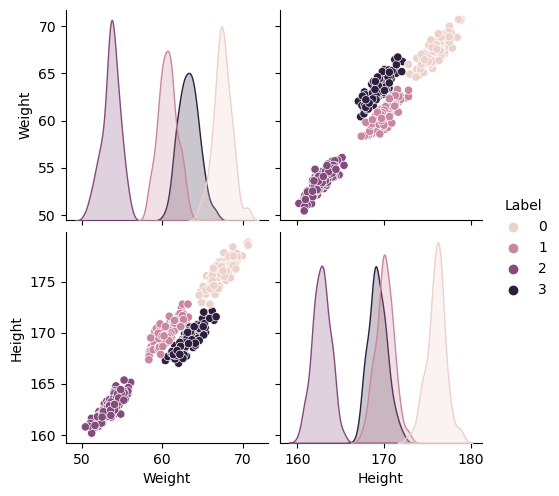

In [41]:
#Visualising the clusters
sns.pairplot(data,hue='Label')

In [42]:
#Generating samples
gmm_data.sample(10000)

(array([[ 66.3982966 , 175.55017066],
        [ 66.30655073, 174.76660085],
        [ 66.08582391, 175.9196545 ],
        ...,
        [ 62.91912328, 169.10446092],
        [ 62.33777882, 168.80944407],
        [ 59.8662782 , 165.99841826]]),
 array([0, 0, 0, ..., 3, 3, 3]))